In [32]:
#%% Esta celda importa las librerías necesarias 
import numpy as np #Necesaria para el manejo de vectores y matrices 
import pandas as pd #Necesaria para el manejo de datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

El cemento es el material más importante en ingeniería civil. La resistencia a la compresión del cemento es una función altamente no lineal de la edad y los ingredientes.

Se proporcionan el nombre de la variable, el tipo de dato, la unidad de medida y una breve descripción. La resistencia a la compresión del cemento es un problema de regresión. El orden de esta lista corresponde al orden de los números a lo largo de las filas de la base de datos.

| Nombre                          | Tipo de dato | Medida               | Descripción           |
|---------------------------------|--------------|----------------------|-----------------------|
| Cemento (variable 1)          | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Escoria de alto horno (variable 2) | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Ceniza volante (variable 3)   | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Agua (variable 4)             | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Superplastificante (variable 5) | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Agregado grueso (variable 6)  | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Agregado fino (variable 7)    | cuantitativo | kg en una mezcla m3  | Variable de entrada   |
| Edad                            | cuantitativo | Día (1~365)          | Variable de entrada   |
| Resistencia a la compresión del concreto | cuantitativo | MPa              | Variable de salida    |

In [33]:
#%% Importación del DataSet
data=pd.read_csv("C:/Users/Pedro/Documents/TFG/Python/Datasets/Concrete_Data.csv", sep=';')

#Veamos un informe del dataset 
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength(MPa. megapascals)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [34]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa. megapascals)          0
dtype: int64

In [35]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength(MPa. megapascals)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<Axes: >

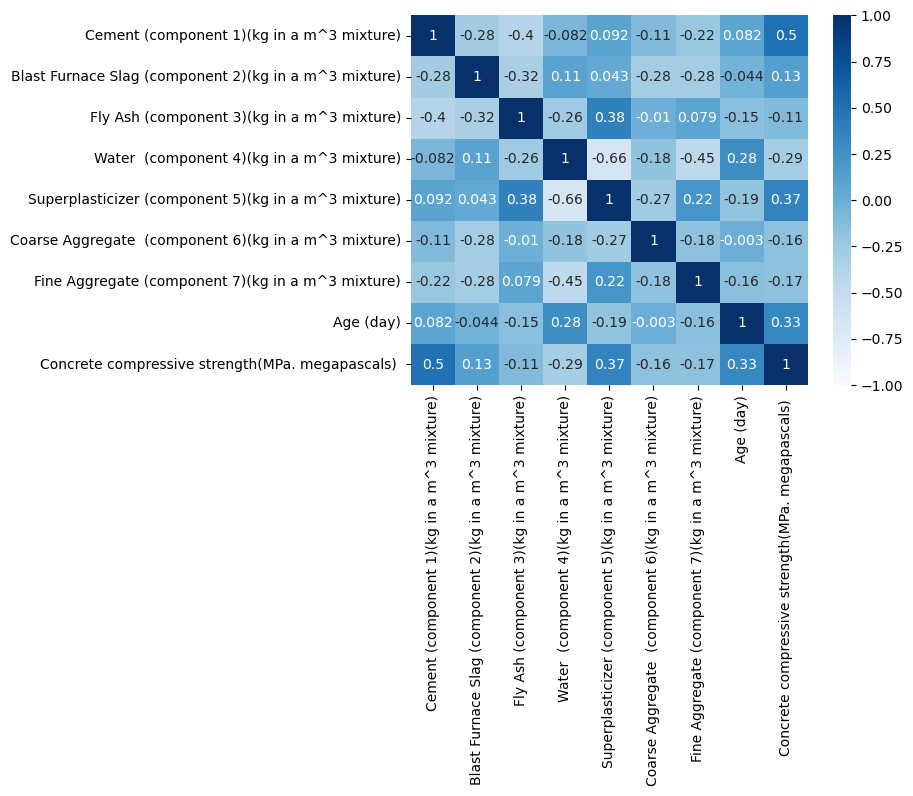

In [36]:
# Representación con un heatmap, pero lo vemos con las correlaciones para que esté todo en la misma escala 
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

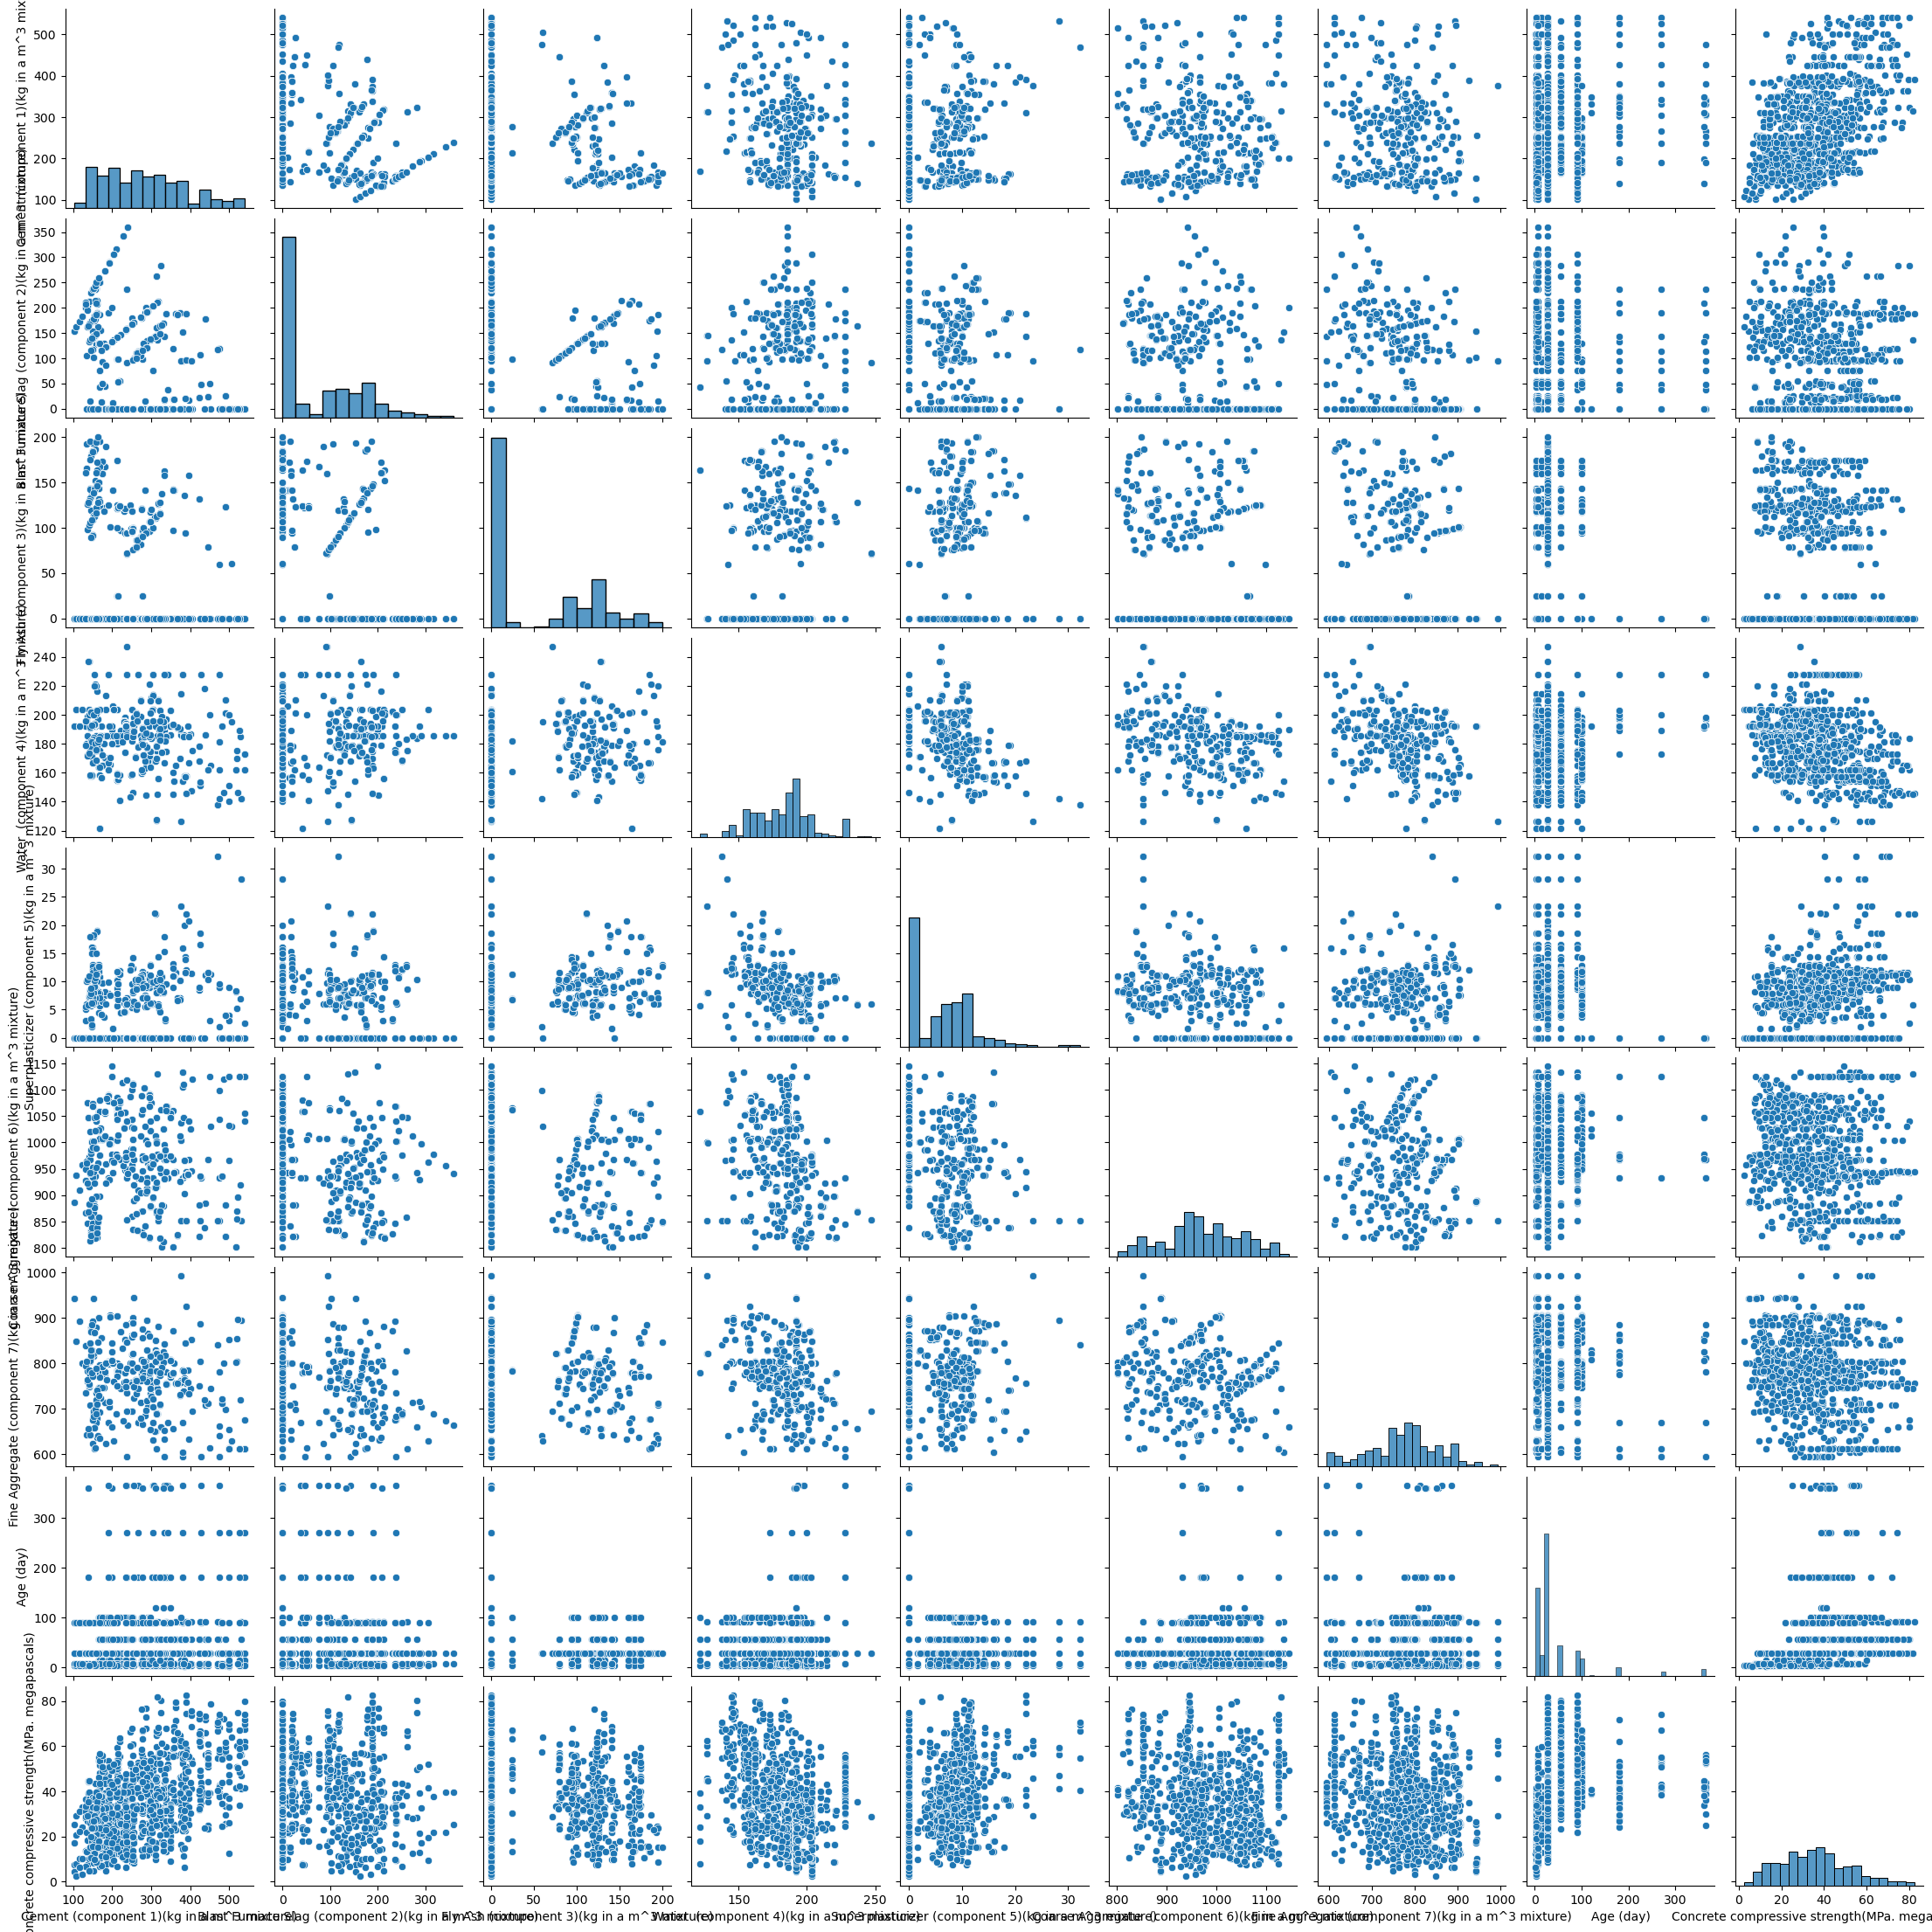

In [37]:
sns.pairplot(data)

# Análisis de Componentes Principales

In [38]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

Vamos a calcular todas las componentes principales para obtener el gráfico

In [39]:
pca=PCA(n_components=9)
X=data.iloc[:,0:9].values #Numpy Array
X=StandardScaler().fit_transform(X)
pca.fit(X)
principalComponents = pca.transform(X)
principalDf_1 = pd.DataFrame(data = principalComponents)
varianzas_explicadas_pca = pca.explained_variance_ratio_
varianzas_explicadas_pca.cumsum()

array([0.25, 0.47, 0.63, 0.74, 0.85, 0.95, 0.98, 1.  , 1.  ])

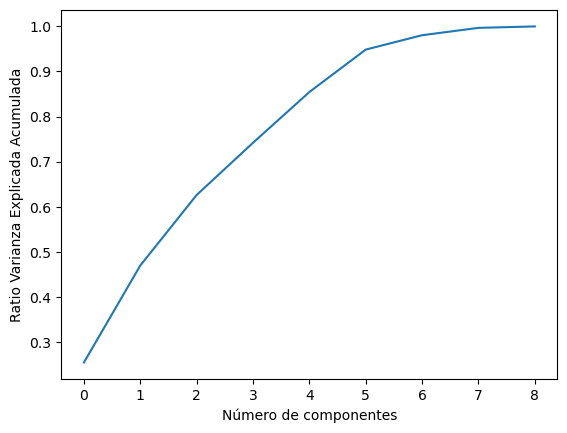

In [40]:
plt.xlabel('Número de componentes')
plt.ylabel('Ratio Varianza Explicada Acumulada')
plt.plot(varianzas_explicadas_pca.cumsum())

In [41]:
coeficientes = pca.components_
np.set_printoptions(precision=2, suppress=True)
# Imprimir los coeficientes
print(coeficientes)

[[ 0.04  0.16 -0.37  0.56 -0.54  0.06 -0.38  0.26 -0.11]
 [ 0.54  0.14 -0.27 -0.12  0.25 -0.22 -0.19  0.25  0.63]
 [ 0.36 -0.7   0.02 -0.12 -0.19  0.55  0.    0.17  0.03]
 [ 0.31 -0.08 -0.6  -0.05 -0.17 -0.22  0.53 -0.36 -0.23]
 [-0.05 -0.36  0.23  0.3  -0.04 -0.55  0.38  0.53  0.  ]
 [-0.39  0.27 -0.32 -0.31 -0.08  0.35  0.41  0.51  0.15]
 [ 0.13 -0.   -0.25  0.01  0.61  0.06 -0.17  0.34 -0.63]
 [ 0.3   0.23  0.26 -0.59 -0.45 -0.24 -0.14  0.23 -0.35]
 [ 0.47  0.45  0.39  0.36  0.05  0.34  0.42  0.04 -0.06]]


In [42]:
pca=PCA(n_components=3)
X=data.iloc[:,0:9].values #Numpy Array
X=StandardScaler().fit_transform(X)
pca.fit(X)
coeficientes = pca.components_
np.set_printoptions(precision=2, suppress=True)
# Imprimir los coeficientes
print(coeficientes)

[[ 0.04  0.16 -0.37  0.56 -0.54  0.06 -0.38  0.26 -0.11]
 [ 0.54  0.14 -0.27 -0.12  0.25 -0.22 -0.19  0.25  0.63]
 [ 0.36 -0.7   0.02 -0.12 -0.19  0.55  0.    0.17  0.03]]


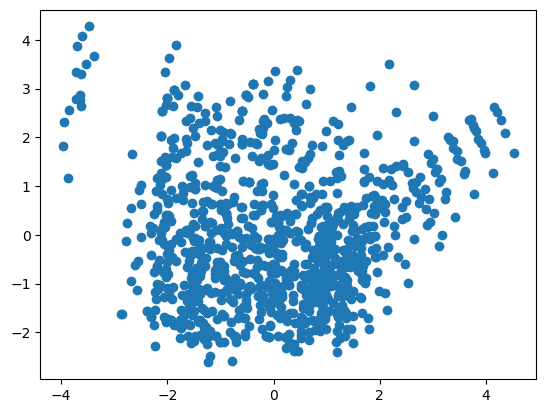

In [55]:
fig = plt.figure()

principalComponents = pca.transform(X)
principalDf_1 = pd.DataFrame(data = principalComponents)
principalDf_1.describe
plt.scatter(principalDf_1.iloc[:,0].values,principalDf_1.iloc[:,1].values)
plt.show()

Veamos los resultados que nos arrojan los distintos regresores:

# Regresión lineal múltiple

In [12]:
def adjusted_R2(R2, n, p):
    """Devuelve Adjusted R2
    n: número de observaciones
    p: número de variables explicativas"""
    return 1-(1-R2)*(n-1)/(n-p-1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:8].values
X.shape
y=data.iloc[:,8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [14]:
#Ajuste del modelo
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=linear.predict(X_test)
print("Coeficientes")
print("Sesgo", linear.intercept_)
print("Coeficientes:", linear.coef_)
print("MSE: %.2f" %mean_squared_error(y_test,y_pred, squared=True))
print("Coefficient of determination: %.2f" %r2_score(y_test,y_pred))
y_pred_regresion=y_pred

Coeficientes
Sesgo -29.514464120592052
Coeficientes: [ 0.12  0.1   0.08 -0.12  0.44  0.02  0.02  0.11]
MSE: 106.14
Coefficient of determination: 0.62


In [16]:
print("Métricas sobre los datos de entrenamiento:")
y_train_pred = linear.predict(X_train)
print(' RMSE: %.3f' % metrics.mean_squared_error(y_train, y_train_pred, squared=True))
R2 = linear.score(X_train, y_train)
print(' R² score: %.3f' % R2)
AdjR2 = adjusted_R2(R2, y_train.shape[0], X_train.shape[1])
print(' Adj.R² score: %.3f' % AdjR2)

Métricas sobre los datos de entrenamiento:
 RMSE: 108.215
 R² score: 0.613
 Adj.R² score: 0.609


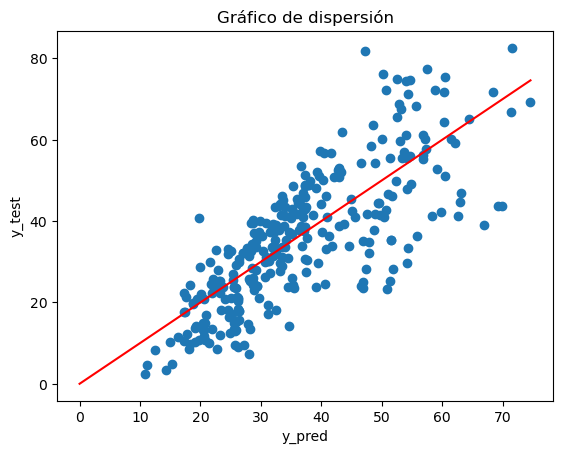

In [17]:
plt.scatter(y_pred, y_test)

# Personalizar el gráfico
plt.title("Gráfico de dispersión")
plt.xlabel("y_pred")
plt.ylabel("y_test")
x=[0,np.max(y_pred)]
y=[0,np.max(y_pred)]
plt.plot(x, y,color='red')

# Mostrar el gráfico
plt.show()

Podemos ver que una regresión lineal en este caso no tiene mucho sentido, pero esto ya se podría predecir debido a que ninguna de las variables predictoras tiene una gran correlación con la variable de salida. 

# Árbol de Regresión

In [18]:
from sklearn.tree import DecisionTreeRegressor
# También ajustamos random_state para obtener resultados reproducibles.
regressor = DecisionTreeRegressor(random_state=56)

In [19]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=56)

In [20]:
# Métricas:
print("Métricas sobre los datos de entrenamiento:")
print(' RMSE: %.3f' % metrics.mean_squared_error(y_train, y_train_pred, squared=True))
R2 = regressor.score(X_train, y_train)
print(' R² score: %.3f' % R2)
AdjR2 = adjusted_R2(R2, y_train.shape[0], X_train.shape[1])
print(' Adj.R² score: %.3f' % AdjR2)

Métricas sobre los datos de entrenamiento:
 RMSE: 108.215
 R² score: 0.995
 Adj.R² score: 0.995


En este caso, estamos ante un muy buen $R^2$, por tanto puede ser una mejor aproximación, veamos que pasa al generalizar las respuestas 

In [21]:
y_pred = regressor.predict(X_test)
y_pred_arbol=y_pred
# Métricas:
print("Métricas sobre los datos de test:")
print(' RMSE: %.3f' % metrics.mean_squared_error(y_test, y_pred, squared=True))
R2 = regressor.score(X_test, y_test)
print(' R² score: %.3f' % R2)
AdjR2 = adjusted_R2(R2, y_train.shape[0], X_train.shape[1])
print(' Adj.R² score: %.3f' % AdjR2)

Métricas sobre los datos de test:
 RMSE: 57.553
 R² score: 0.792
 Adj.R² score: 0.790


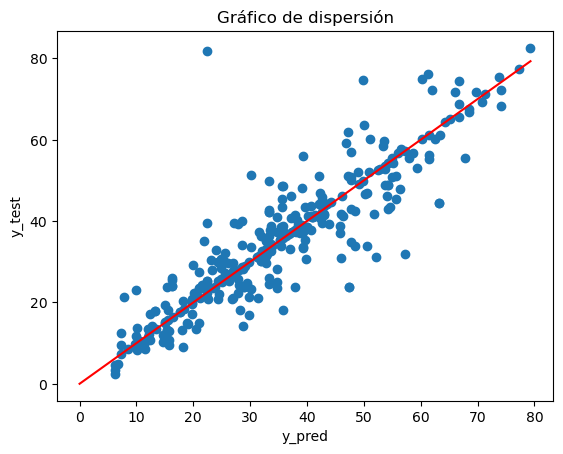

In [22]:
plt.scatter(y_pred, y_test)

# Personalizar el gráfico
plt.title("Gráfico de dispersión")
plt.xlabel("y_pred")
plt.ylabel("y_test")
x=[0,np.max(y_pred)]
y=[0,np.max(y_pred)]
plt.plot(x, y,color='red')
# Mostrar el gráfico
plt.show()

# Red Neuronal

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.regularizers import l2

# Crear el modelo secuencial
model = keras.Sequential()
tf.random.set_seed(56)

# Capa oculta con 13 neuronas
model.add(layers.Dense(13, activation='relu',kernel_regularizer=l2(0.01)))

# Capa con una neurona
#model.add(layers.Dense(1, activation='relu',kernel_regularizer=l2(0.01)))

# Capa final de desescalado
model.add(layers.Dense(1, activation='linear')) # output_dim es la dimensión de los datos de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error') # Puedes elegir el optimizador y la función de pérdida adecuados a tu problema

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1000) # X_train son los datos de entrada y y_train son los datos de salida

print('RMSE: %.3f' % metrics.mean_squared_error(y_train, model.predict(X_train), squared=True))
 



Epoch 1/1000
23/23 [==============================] - 0s 997us/step - loss: 159815.2031
Epoch 2/1000
23/23 [==============================] - 0s 815us/step - loss: 47614.0156
Epoch 3/1000
23/23 [==============================] - 0s 905us/step - loss: 13096.5322
Epoch 4/1000
23/23 [==============================] - 0s 854us/step - loss: 7660.5879
Epoch 5/1000
23/23 [==============================] - 0s 842us/step - loss: 7108.7744
Epoch 6/1000
23/23 [==============================] - 0s 819us/step - loss: 6659.0708
Epoch 7/1000
23/23 [==============================] - 0s 773us/step - loss: 6219.8613
Epoch 8/1000
23/23 [==============================] - 0s 819us/step - loss: 5804.5513
Epoch 9/1000
23/23 [==============================] - 0s 864us/step - loss: 5392.1138
Epoch 10/1000
23/23 [==============================] - 0s 819us/step - loss: 5011.7432
Epoch 11/1000
23/23 [==============================] - 0s 856us/step - loss: 4637.7891
Epoch 12/1000
23/23 [===========================

In [24]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 667us/step


In [25]:
print("Métricas sobre los datos de test:")
print(' MSE: %.3f' % metrics.mean_squared_error(y_test, y_pred, squared=True))
print("Pérdida total", model.evaluate(X_test,y_test))
y_pred_nn=np.ravel(y_pred)


Métricas sobre los datos de test:
 MSE: 50.228
10/10 [==============================] - 0s 820us/step - loss: 50.3531
Pérdida total 50.353145599365234


Hay una gran diferencia entre la predicción de la red neuronal y con el resto de métodos, veamos la diferencia entre los 4 prediccion

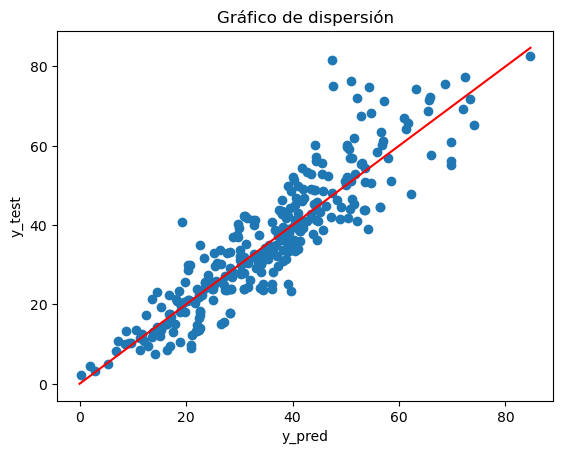

In [26]:
plt.scatter(y_pred, y_test)

# Personalizar el gráfico
plt.title("Gráfico de dispersión")
plt.xlabel("y_pred")
plt.ylabel("y_test")
x=[0,np.max(y_pred)]
y=[0,np.max(y_pred)]
plt.plot(x, y,color='red')
# Mostrar el gráfico
plt.show()

En particular, si ahora hacemos el error cuadrático medio de cada uno de los conjuntos de test, podemos tener una estimación de cada uno de ellos, pudiendo hacer hasta un contraste de hipótesis para ver si el error medio es significativamente distinto. 

In [27]:
#Para empezar calculamos los vectores de error cuadrático. 

err_sqr_regress=np.square(y_pred_regresion-y_test)
err_sqr_trees=np.square(y_pred_arbol-y_test)
err_sqr_nn=np.square(y_pred_nn-y_test)

print(np.mean(err_sqr_regress))
print(np.mean(err_sqr_trees))
print(np.mean(err_sqr_nn))

106.13612327802757
57.553116828478956
50.228200689759674


Ahora quiero ver si los errores cuadráticos medios son significativamente distintos, entonces hacemos un contraste de hipótesis sobre las medias de los errores calculados anteriormente. 

In [28]:
from scipy import stats
t_statistic, p_value = stats.mannwhitneyu(err_sqr_regress, err_sqr_trees)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: 67022.0
Valor p: 3.649780105986201e-18


Es decir, podemos afirmar de manera altamente significativa que las predicciones realizadas mediante un modelo lineal son bastante peores que las 

In [29]:
t_statistic, p_value = stats.mannwhitneyu(err_sqr_trees, err_sqr_nn)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: 40386.0
Valor p: 0.0009191702508923502


Es decir, entre la red neuronal y el árbol de regresión no hay diferencia a la hora de realizar predicciones. Es decir podemos asumir que el error cuadrático medio en muestras que no se han usado para ajustar es similar

In [30]:
t_statistic, p_value = stats.mannwhitneyu(err_sqr_regress, err_sqr_nn)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: 62059.0
Valor p: 1.1065634007061393e-10


Podemos concluir entonces que de manera altamente significativa que la predicción con una red neuronal es mejor que con un modelo lineal. 


Por tanto, en este caso deberíamos elegir como modelo predictivo el árbol de regresión ya que este otorga una interpretación sencilla al poder representar de manera sencilla la partición del espacio que se realiza. Mientras que la red neuronal solo puede usarse para la predicción. 